In [1]:
import os
import numpy as np
import pandas as pd
from scroutines.config_plots import *

In [2]:
ddir = '/u/home/f/f7xiesnm/project-zipursky/easifish/lt186/proc/r1-r2-v2/'
# n5dir = '/data/qlyu/v1/data/easifish/lt186/r1/stitching/export.n5'
f1 = os.path.join(ddir, 'roi.csv')
f2 = os.path.join(ddir, 'spotcount.csv') #_intn.csv')

In [3]:
df1 = pd.read_csv(f1, index_col=0)
df2 = pd.read_csv(f2, index_col=0)
df  = df1.join(df2)

In [4]:
amin, amax = 500, 5000
cond = ((df['area'] < amax) & (df['area'] > amin))
df = df[cond]

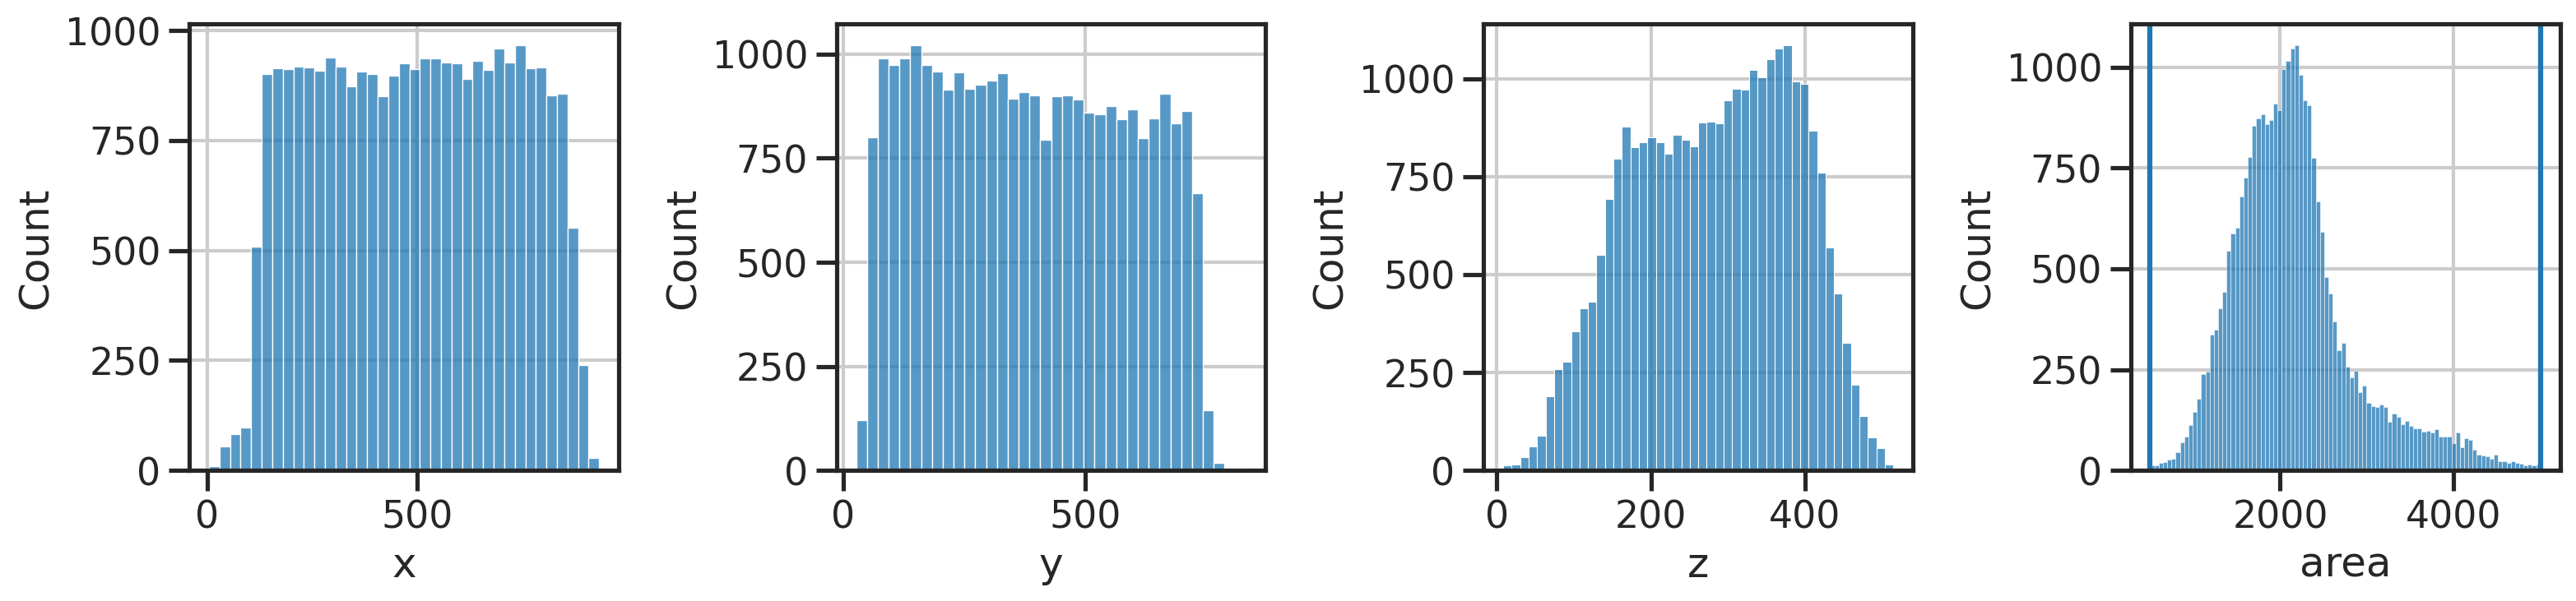

In [5]:
# cell level stats
fig, axs = plt.subplots(1,4,figsize=(4*4,1*4))
ax = axs[0]
sns.histplot(df['x'].values, ax=ax)
ax.set_xlabel('x')
ax = axs[1]
sns.histplot(df['y'].values, ax=ax)
ax.set_xlabel('y')
ax = axs[2]
sns.histplot(df['z'].values, ax=ax)
ax.set_xlabel('z')
ax = axs[3]
sns.histplot(df['area'].values, ax=ax)
ax.set_xlabel('area')
ax.axvline(amin)
ax.axvline(amax)
fig.tight_layout()
plt.show()

In [6]:
channels = [
    'r1_c0',  'r1_c2',
]
genes = [
    'RL (Cre)',
    'LM (FlpO)',
]

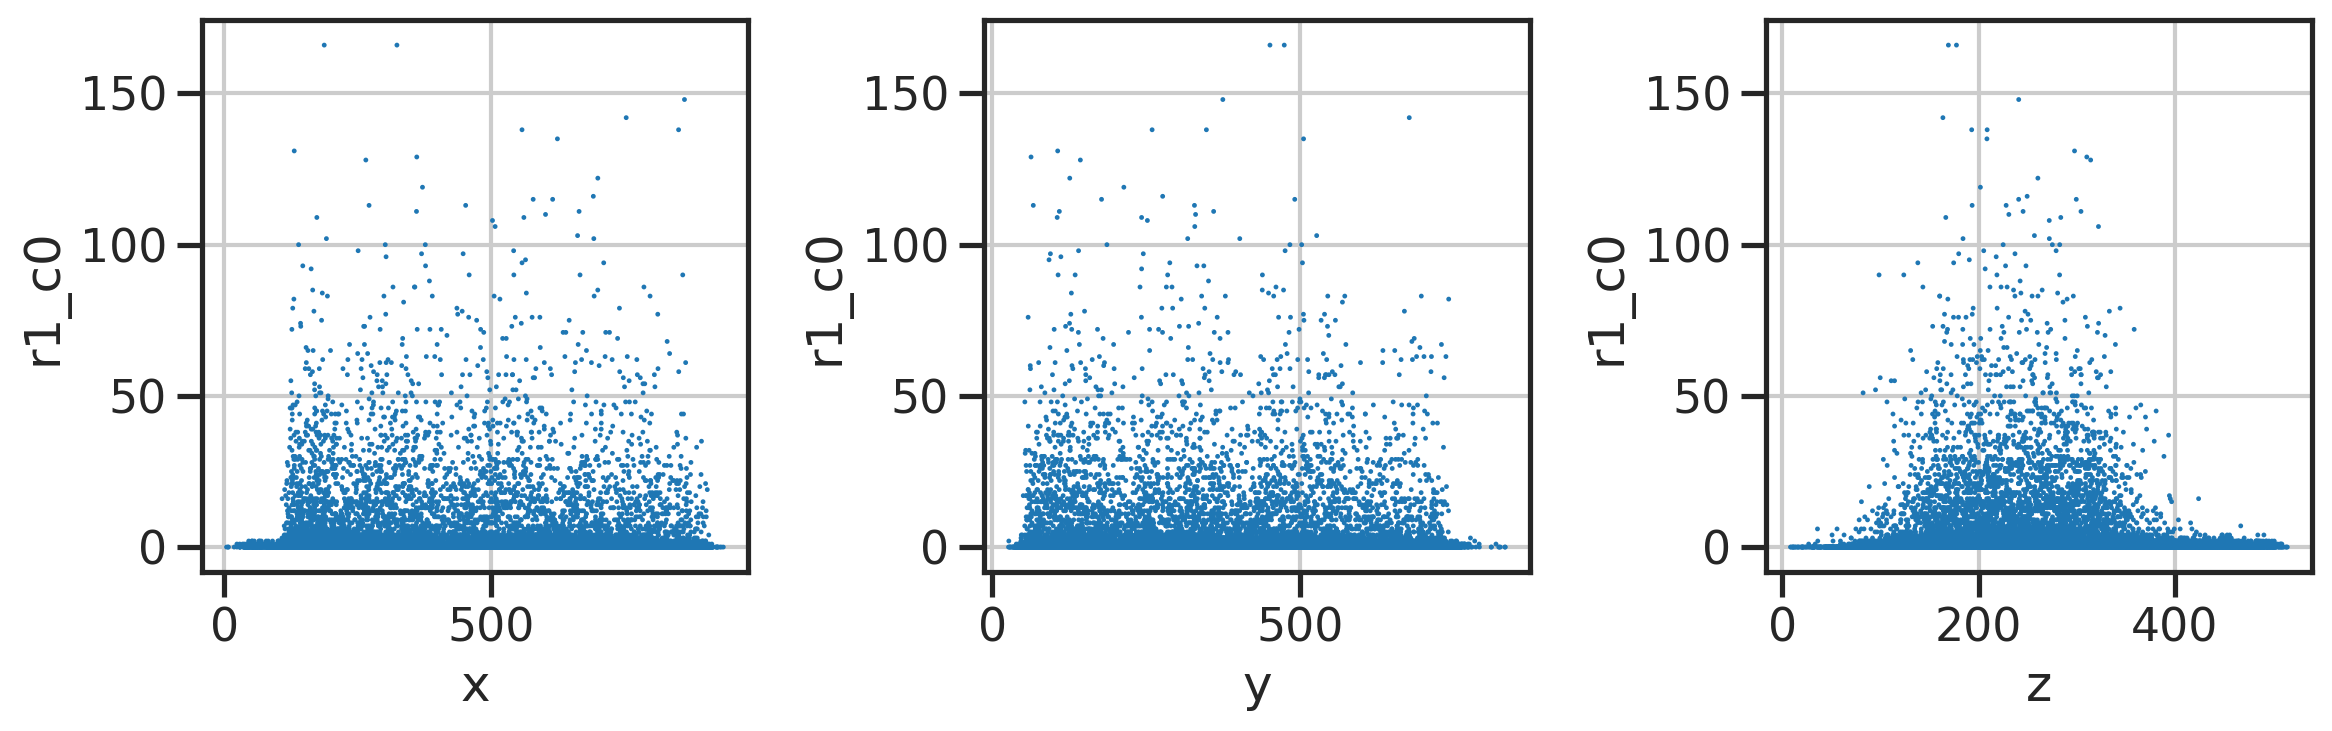

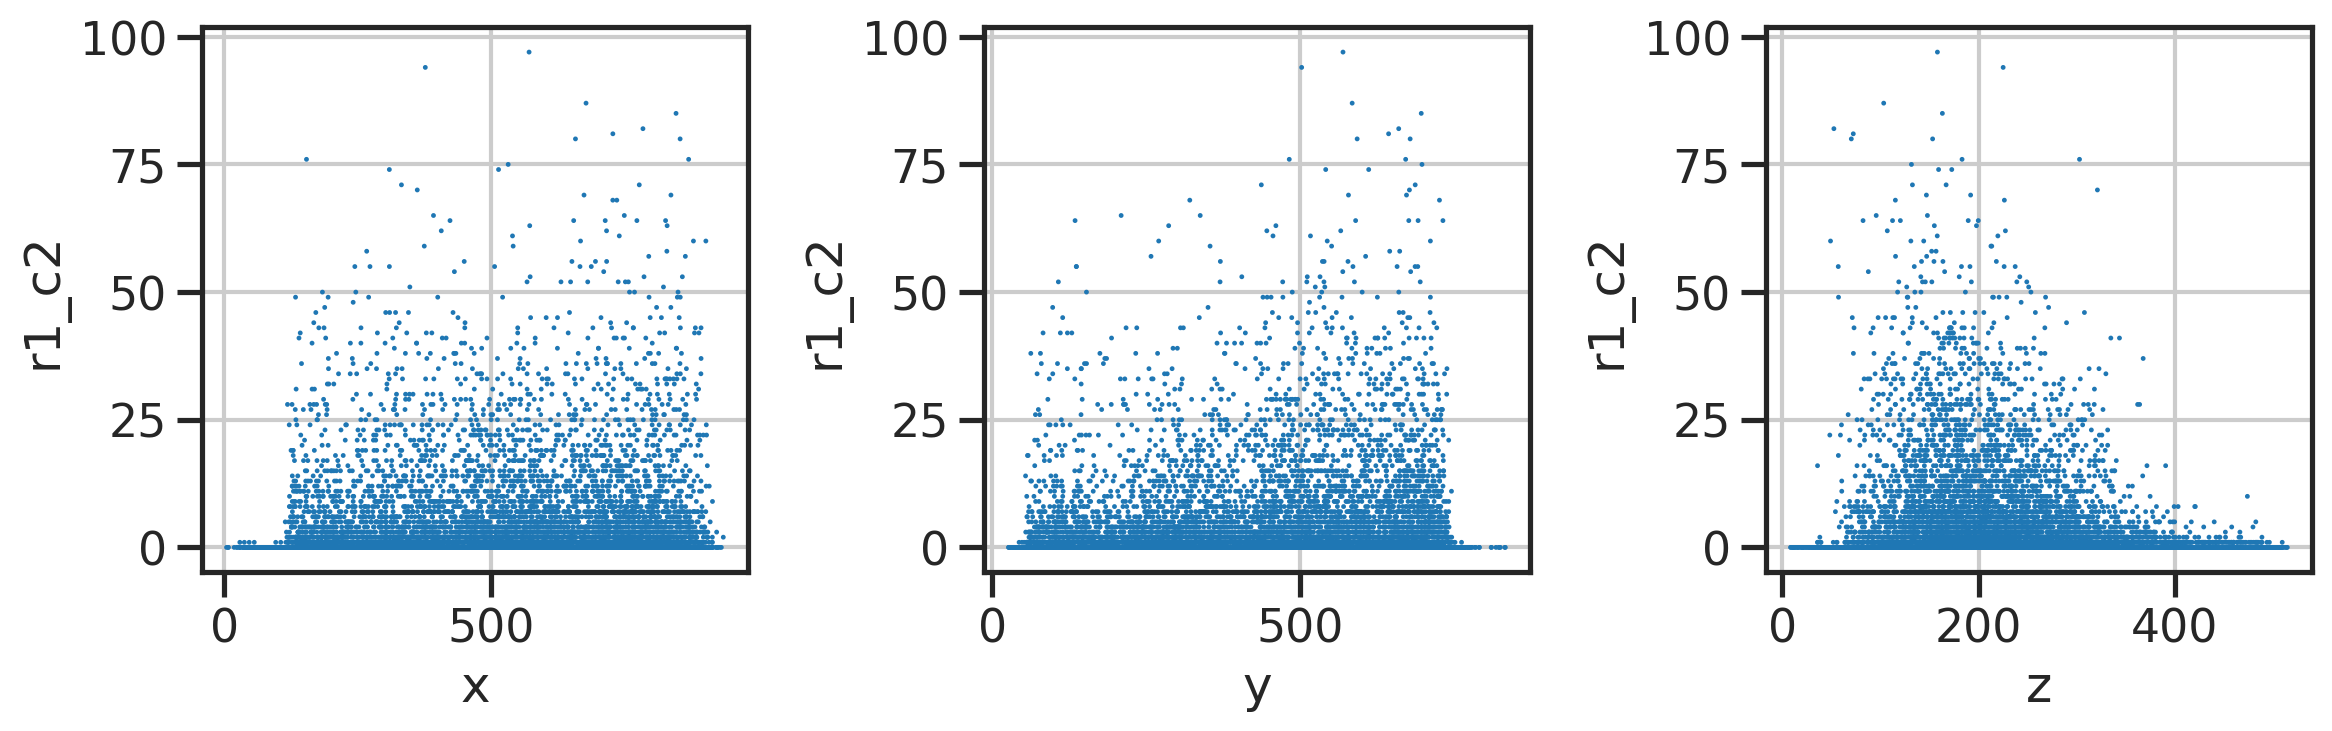

In [7]:
# cell level stats
for ch in channels: 
    fig, axs = plt.subplots(1,3,figsize=(3*4,1*4))
    ax = axs[0]
    sns.scatterplot(data=df, x='x', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('x')

    ax = axs[1]
    sns.scatterplot(data=df, x='y', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('y')

    ax = axs[2]
    sns.scatterplot(data=df, x='z', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('z')

    fig.tight_layout()
    plt.show()

In [8]:
df.describe()

z             y             x          area         r1_c0  \
count  28004.000000  28004.000000  28004.000000  28004.000000  28004.000000   
mean     282.341452    386.399347    494.997803   2160.368338      2.478396   
std      102.790383    201.140542    223.533997    704.825133      8.899756   
min        8.210331     26.664865      4.164600    502.660032      0.000000   
25%      199.225670    210.137105    301.664880   1694.966784      0.000000   
50%      289.607430    379.455886    497.608385   2075.338944      0.000000   
75%      367.135745    559.250769    688.085938   2443.624512      1.000000   
max      514.876611    833.382355    933.956930   4998.872256    166.000000   

              r1_c2         r2_c0         r2_c1         r2_c2         r2_c4  
count  28004.000000  28004.000000  28004.000000  28004.000000  28004.000000  
mean       1.611377      6.750964      4.986252      2.697008      1.002107  
std        5.931996      7.064770      6.467877      3.519157      1.815577  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      2.000000      1.000000      0.000000      0.000000  
50%        0.000000      5.000000      3.000000      1.000000      0.000000  
75%        0.000000      9.000000      7.000000      4.000000      1.000000  
max       97.000000     86.000000    159.000000     70.000000     22.000000

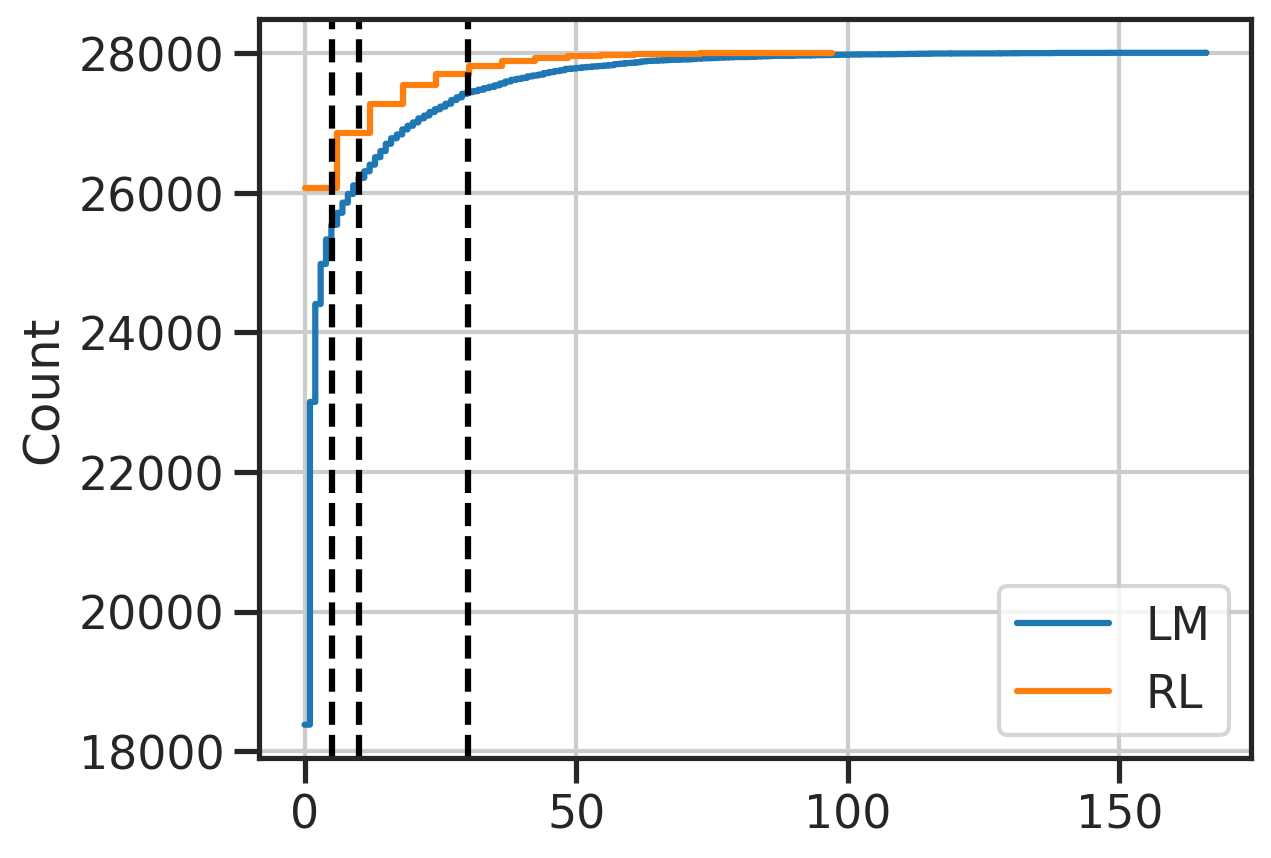

In [9]:
fig, ax = plt.subplots()
sns.histplot(df['r1_c0'].values, cumulative=True, element='step', fill=False, label='LM', ax=ax)
sns.histplot(df['r1_c2'].values, cumulative=True, element='step', fill=False, label='RL', ax=ax)
ax.axvline(5, linestyle='--', color='k')
ax.axvline(10, linestyle='--', color='k')
ax.axvline(30, linestyle='--', color='k')
ax.legend()

100.0


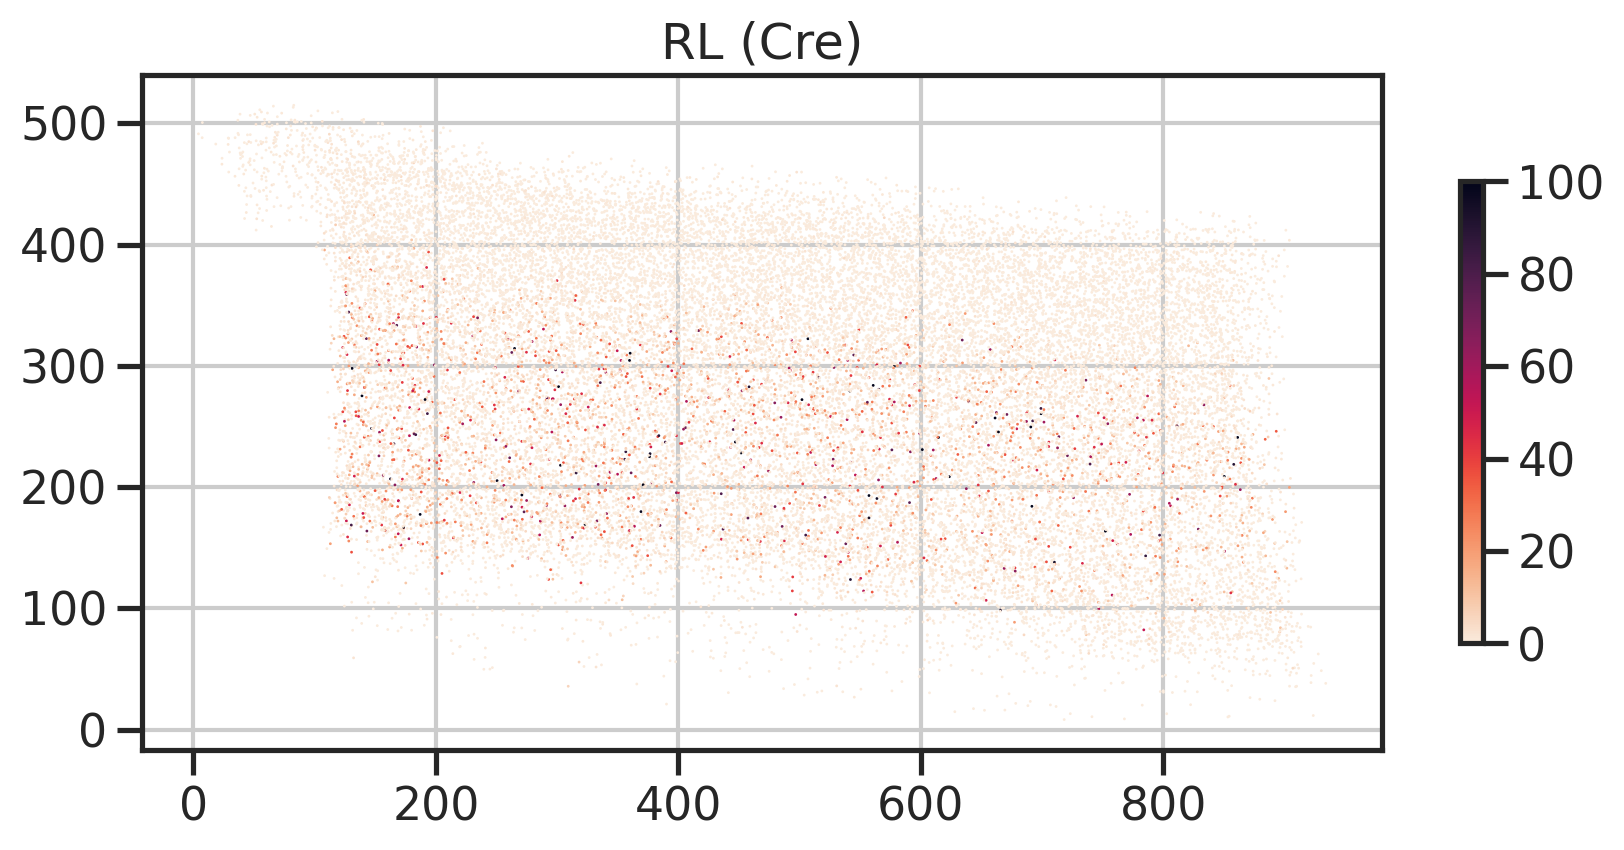

62.99700000000303


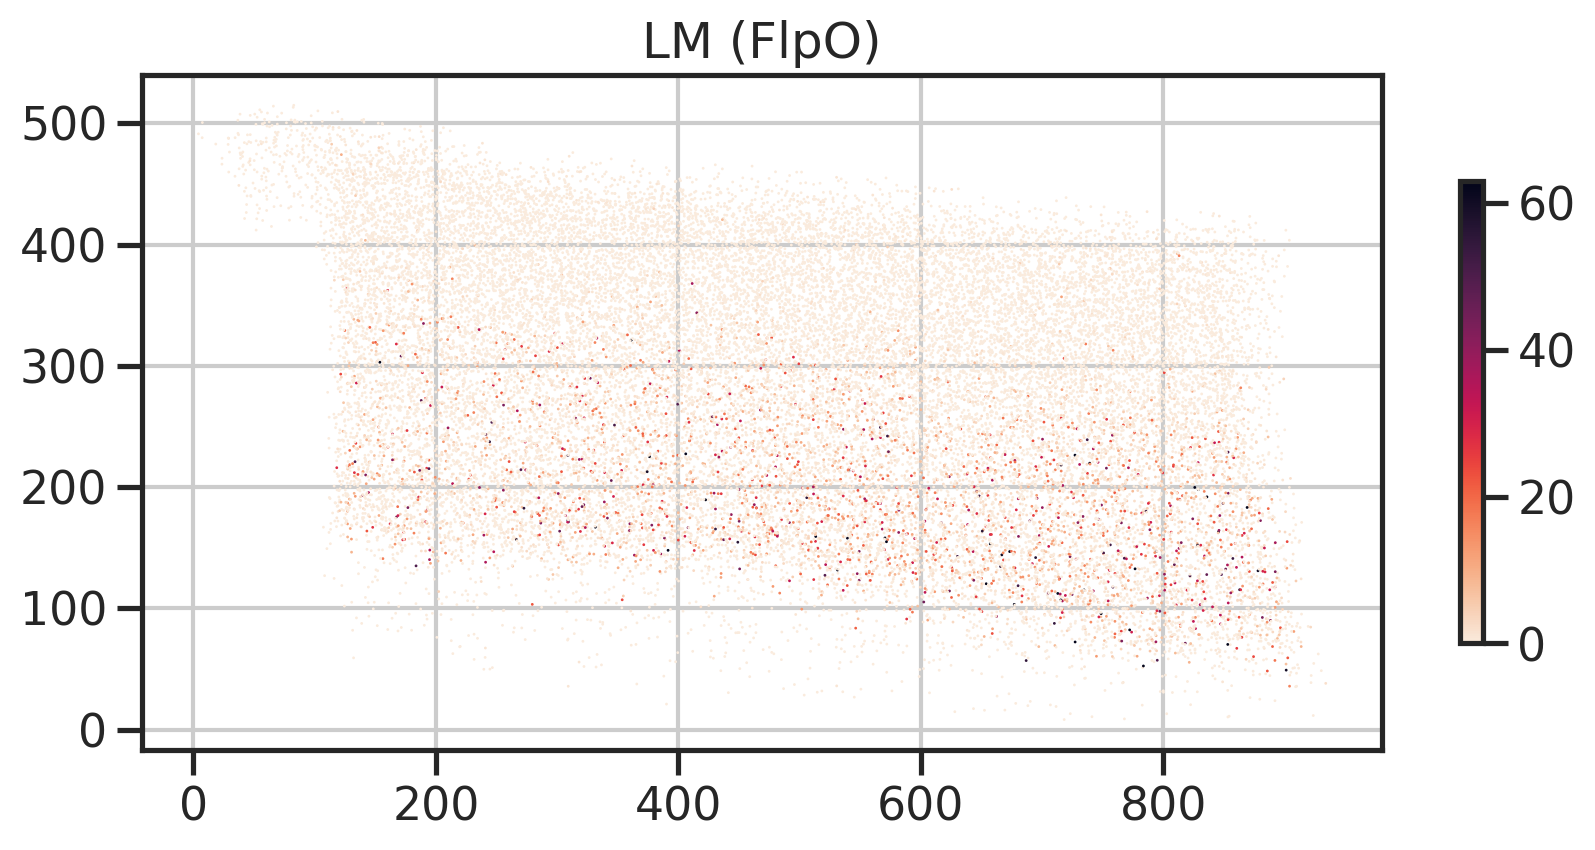

In [10]:
for ch, gene in zip(channels, genes):
    fig, ax = plt.subplots(figsize=(10,10))
    vmax = np.percentile(df[f'{ch}'], 99.9)
    print(vmax)
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'{ch}'], s=1, edgecolor='none', 
                   vmax = vmax,
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
    plt.show()

In [11]:
def rename(code):
    rename_dict = {
        0: 'NA', 
        1: 'RL', 
        2: 'LM', 
        3: 'both'}
    return rename_dict[code]

df = df.copy()
th_c0 = 9 
th_c2 = 7 
df['bi_r1_c0'] = df['r1_c0'] > th_c0 
df['bi_r1_c2'] = df['r1_c2'] > th_c2 
df['lbl'] = df['bi_r1_c0'].astype(int) + 2*df['bi_r1_c2'].astype(int)
df['lbl_v2'] = df['lbl'].apply(rename)
np.unique(df['lbl'].values)
np.unique(df['lbl_v2'].values)


array(['LM', 'NA', 'RL', 'both'], dtype=object)

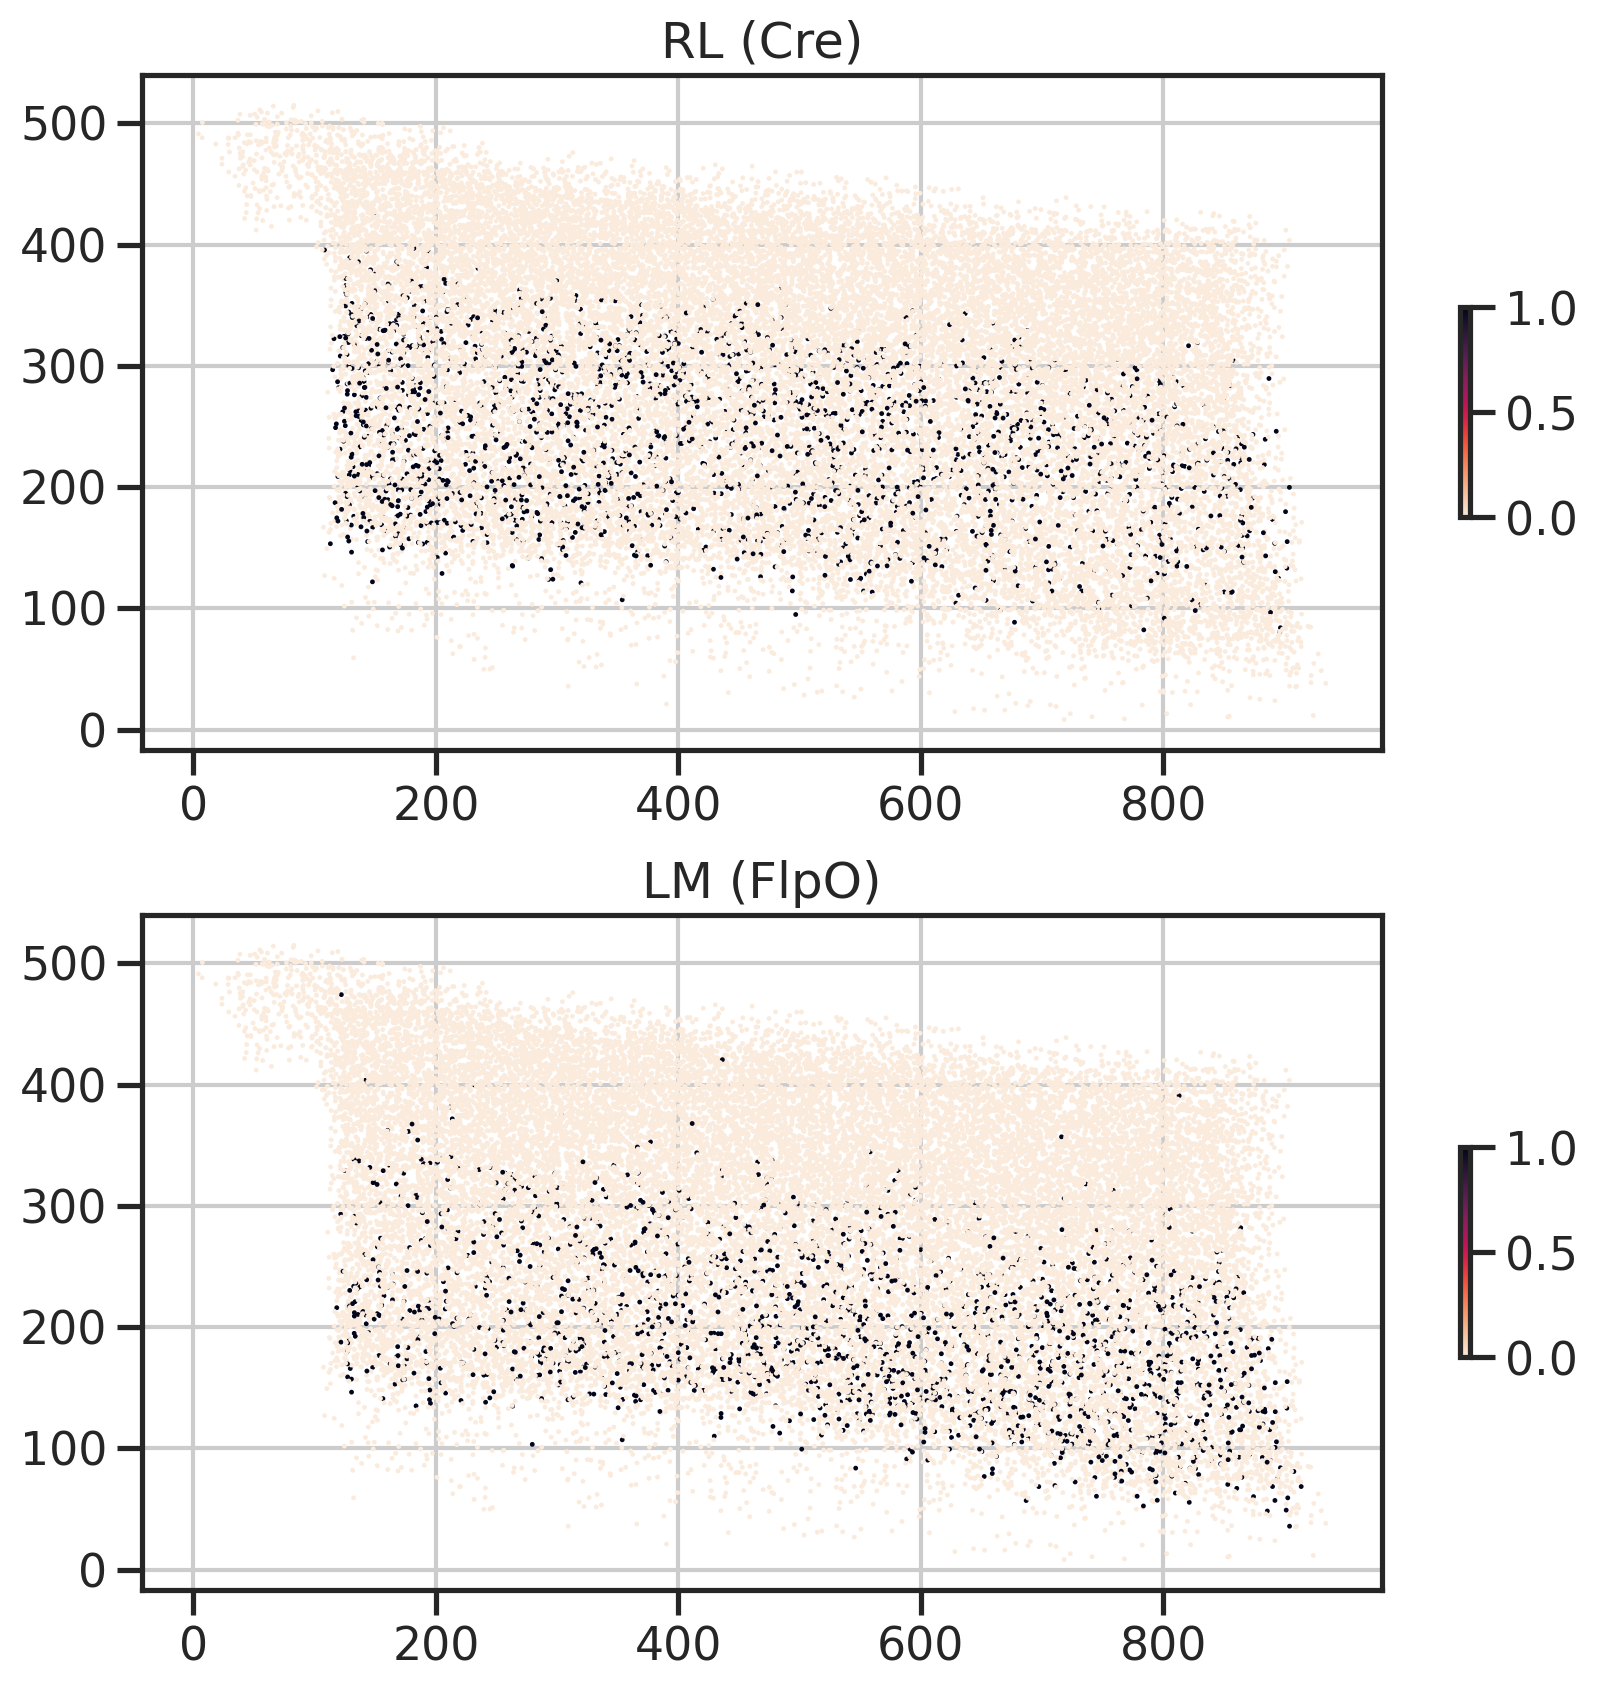

In [12]:
fig, axs = plt.subplots(2,1,figsize=(10,5*2))
for ax, ch, gene in zip(axs, channels, genes):
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'bi_{ch}'], s=3, edgecolor='none', 
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
plt.show()

In [13]:
sns.color_palette('tab10', 10)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [14]:
palette = {
    'NA': 'lightgray', 
    'LM': 'C3', 
    'RL': 'C0', 
    'both': 'C6', 
}

In [15]:
df.value_counts('lbl_v2')

lbl_v2
NA      24684
RL       1579
LM       1420
both      321
dtype: int64

In [16]:
a = df.value_counts('lbl_v2')
print(a/len(df)*100, "\n")

print(f"both in LM (%): {a.loc['both']/(a.loc['both']+a.loc['LM'])*100:.1f}")
print(f"both in RL (%): {a.loc['both']/(a.loc['both']+a.loc['RL'])*100:.1f}")
print(f"RL/LM (%): {(a.loc['both']+a.loc['RL'])/(a.loc['both']+a.loc['LM'])*100:.1f}")

lbl_v2
NA      88.144551
RL       5.638480
LM       5.070704
both     1.146265
dtype: float64 

both in LM (%): 18.4
both in RL (%): 16.9
RL/LM (%): 109.1


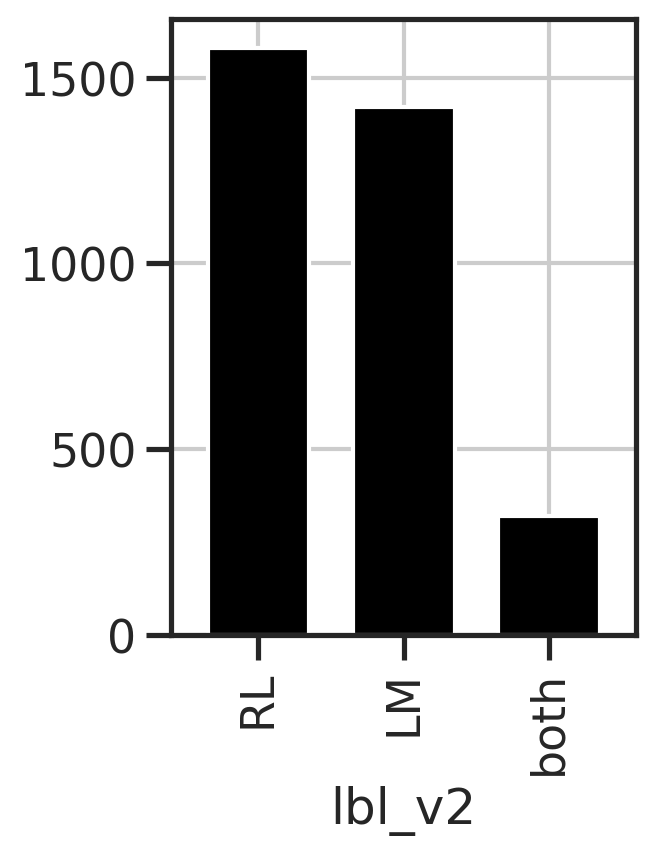

In [17]:
fig, ax = plt.subplots(figsize=(3,4))
df[df['lbl_v2']!='NA'].value_counts('lbl_v2').plot.bar(width=0.7, color='black')
plt.show()

In [18]:
def plot_easifish_proj(data, x, y, hue='lbl_v2', na_rep='NA', invert_yaxis=False, figsize=(8,8)):
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(data=df, 
                    x=x, y=y, color='lightgray', s=2, edgecolor='none')
    sns.scatterplot(data=df[df[hue]!=na_rep], 
                    x=x, y=y, hue=hue, palette=palette, s=5, edgecolor='none')
    if invert_yaxis:
        ax.invert_yaxis()
        
    ax.grid(False)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

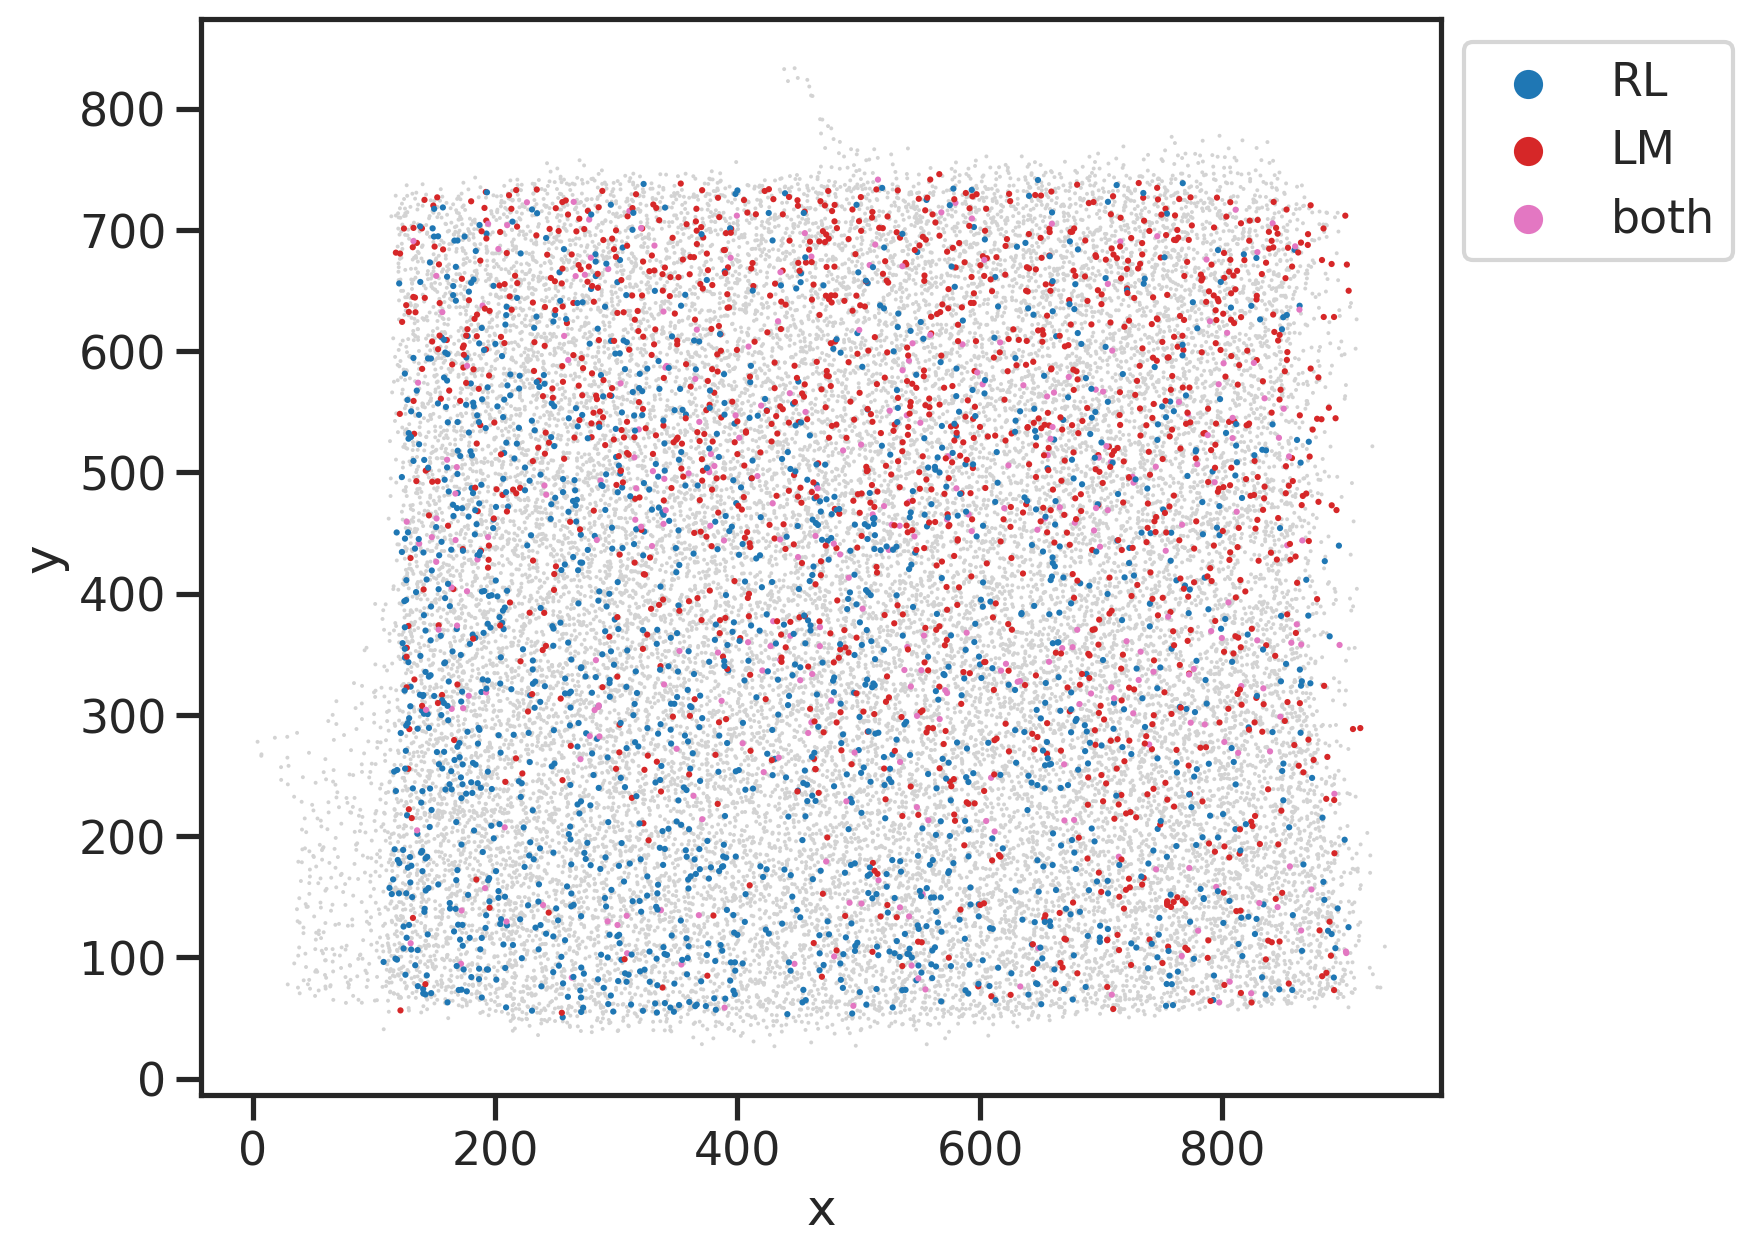

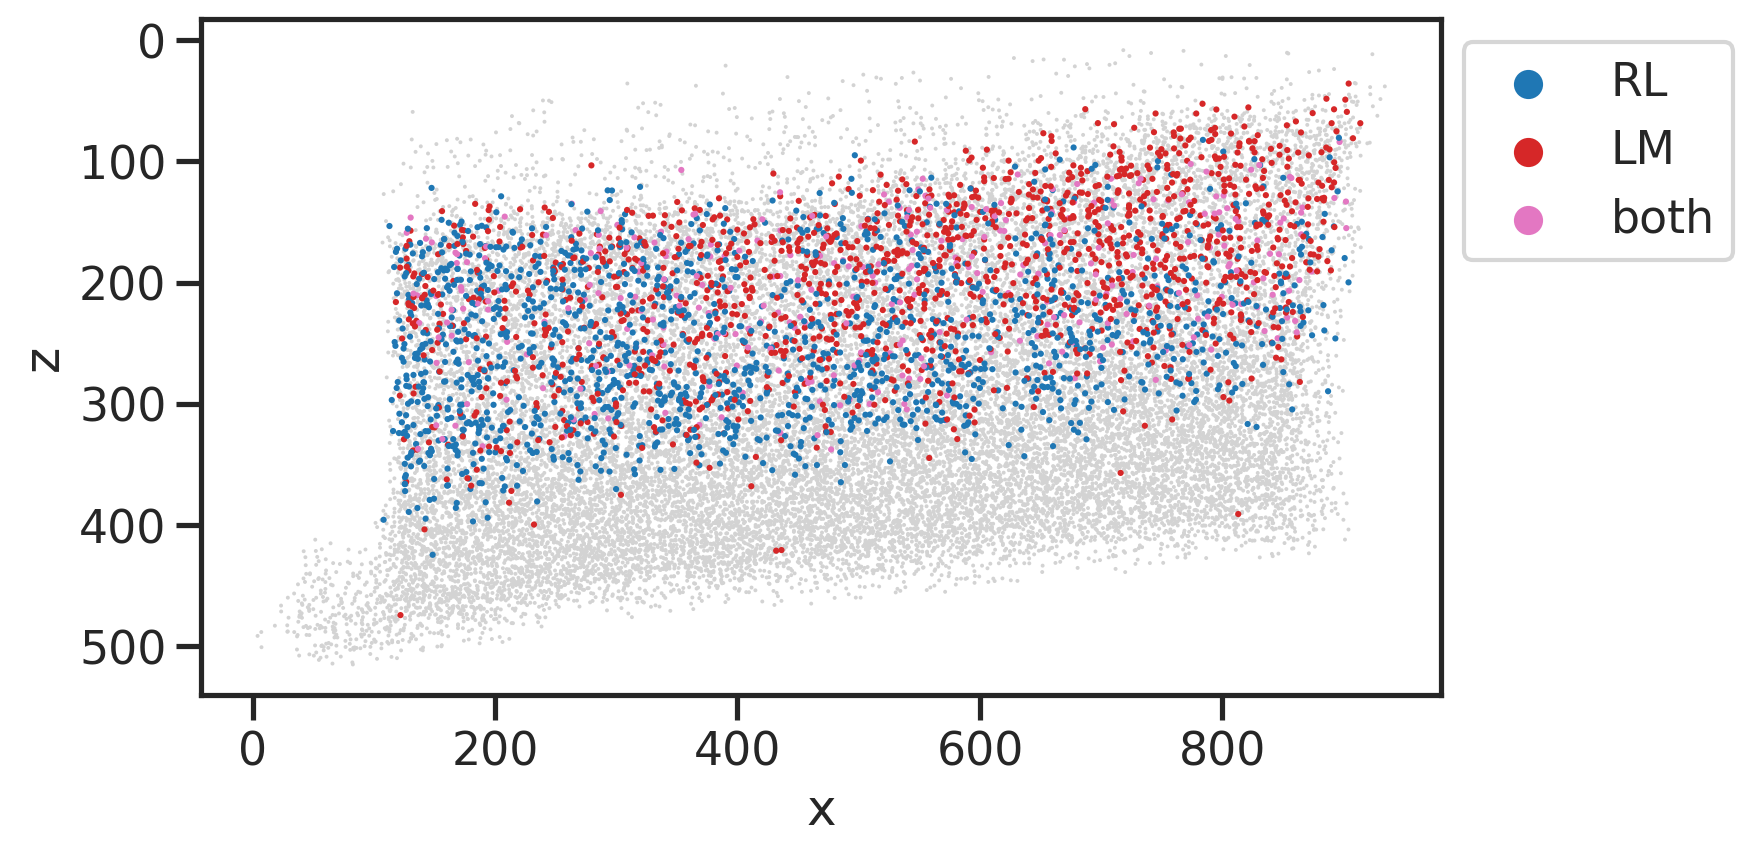

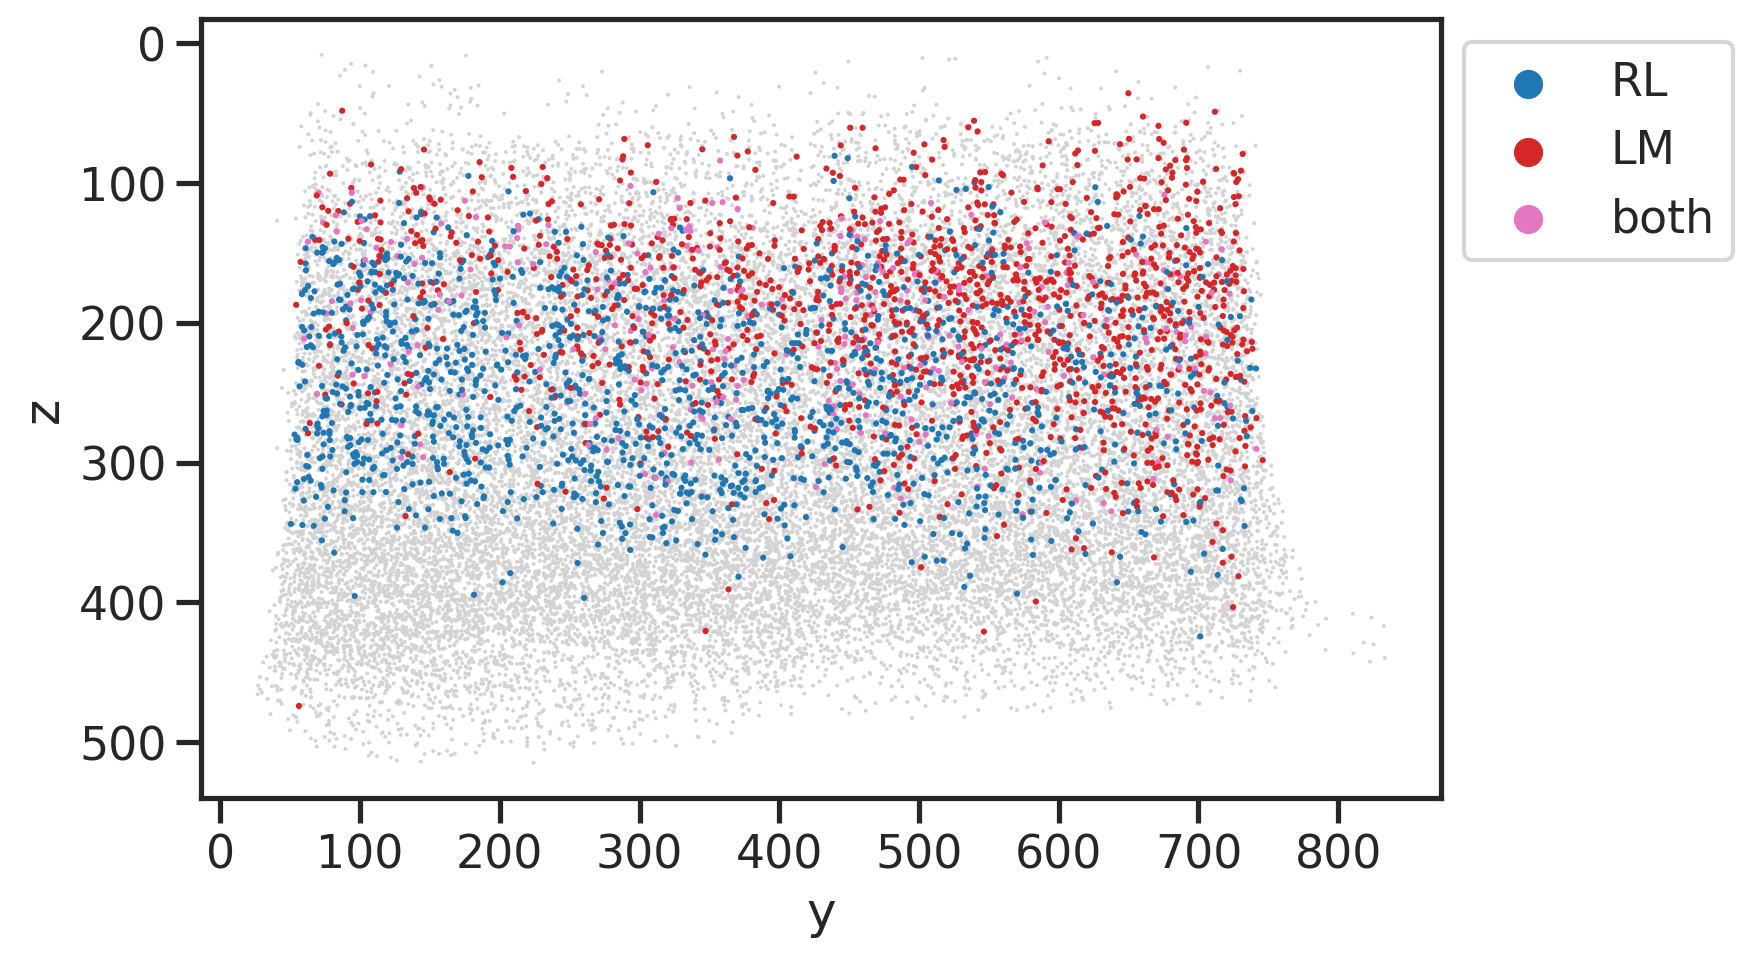

In [19]:
plot_easifish_proj(df, 'x', 'y')
plot_easifish_proj(df, 'x', 'z', invert_yaxis=True)
plot_easifish_proj(df, 'y', 'z', invert_yaxis=True)

In [20]:
# fout = "/data/qlyu/v1/results_easifish/lt186_r1_labels_Jun1.csv"
# df.to_csv(fout)
# !head $fout

# Quantify overlap

In [23]:
def plot_reverse_cumsum(counts, bins=np.arange(0,11,1), ymax=None):
    """
    """
    fig, ax = plt.subplots(figsize=(8,6))
    ax2 = ax.twinx()
    ax.set_xlabel('num spots')
    ax.set_ylabel('num cells (cumulative)')
    ax2.set_ylabel('fraction of cells')
    
    n = len(counts)
    cnts, _ = np.histogram(counts, bins)
    rev_cumsum = n-np.cumsum(cnts)
        
    ax.plot(bins[1:], rev_cumsum, '-o', )
    ax2.plot(bins[1:], rev_cumsum/n, '-o', )
    
    if ymax:
        ax.set_ylim(ymin=0, ymax=ymax)
        ax2.set_ylim(ymin=0, ymax=ymax/n)
        
    ax.grid(False)
    ax2.grid(False)
    
    return fig

def plot_reverse_cumsum_complex(counts_list, label_list=None, color_list=None, bins=np.arange(0,11,1), ymax=None):
    """
    """
    fig, axs = plt.subplots(1,2,figsize=(2*8,6))
    ax = axs[0]
    ax2 = ax.twinx()
    ax.set_xlabel('num spots')
    ax.set_ylabel('num cells (cumulative)')
    ax2.set_ylabel('fraction of cells')
    
    if label_list is None:
        label_list = np.arange(len(counts_list))
    if color_list is None:
        color_list = sns.color_palette(n_colors=3)
        
    cumsum_list = []
    n = len(counts_list[0])
    for counts in counts_list:
        assert n == len(counts) # assumes len(counts) is the same
        cnts, _ = np.histogram(counts, bins)
        rev_cumsum = n-np.cumsum(cnts)
        cumsum_list.append(rev_cumsum)
        
    for revcnts, lb, color in zip(cumsum_list, label_list, color_list):
        ax.plot(bins[1:], revcnts, '-o', label=lb, color=color)
        ax2.plot(bins[1:], revcnts/n, '-o', label=lb, color=color)
    
    if ymax:
        ax.set_ylim(ymin=0, ymax=ymax)
        ax2.set_ylim(ymin=0, ymax=ymax/n)
        
    ax.grid(False)
    ax2.grid(False)
    
    ax = axs[1]
    lb = label_list[1]
    color = color_list[1]
    ax.plot(bins[1:], cumsum_list[1]/cumsum_list[0], '-o', label=lb, color=color)
    
    lb = label_list[2]
    color = color_list[2]
    ax.plot(bins[1:], cumsum_list[2]/cumsum_list[0], '-o', label=lb, color=color)
    ax.set_yscale('log')
    ax.set_yticks([1,0.1,0.05,0.01])
    ax.set_yticklabels([1,0.1,0.05, 0.01])
    ax.set_ylabel('eFDR (shuff/data)')
    
    fig.subplots_adjust(wspace=0.4)
    
    return fig, axs

def plot_frac(data, shff, bins=np.arange(0,11,1)):
    """
    """
    fig, ax = plt.subplots()
    
    cnts_data, bins = np.histogram(data, bins)
    cnts_shff, bins = np.histogram(shff, bins)
    
    ax.plot(bins[1:], cnts_shff/cnts_data, '-o')
    ax.set_yscale('log')
    ax.set_yticks([1,0.1,0.05,0.01])
    ax.set_yticklabels([1,0.1,0.05, 0.01])
    
    return fig

In [27]:
c_c0 = df['r1_c0']
c_c2 = df['r1_c2']
c_bth = np.minimum(c_c0, c_c2) #df['r1_c0'].values, df['r1_c2'].values)

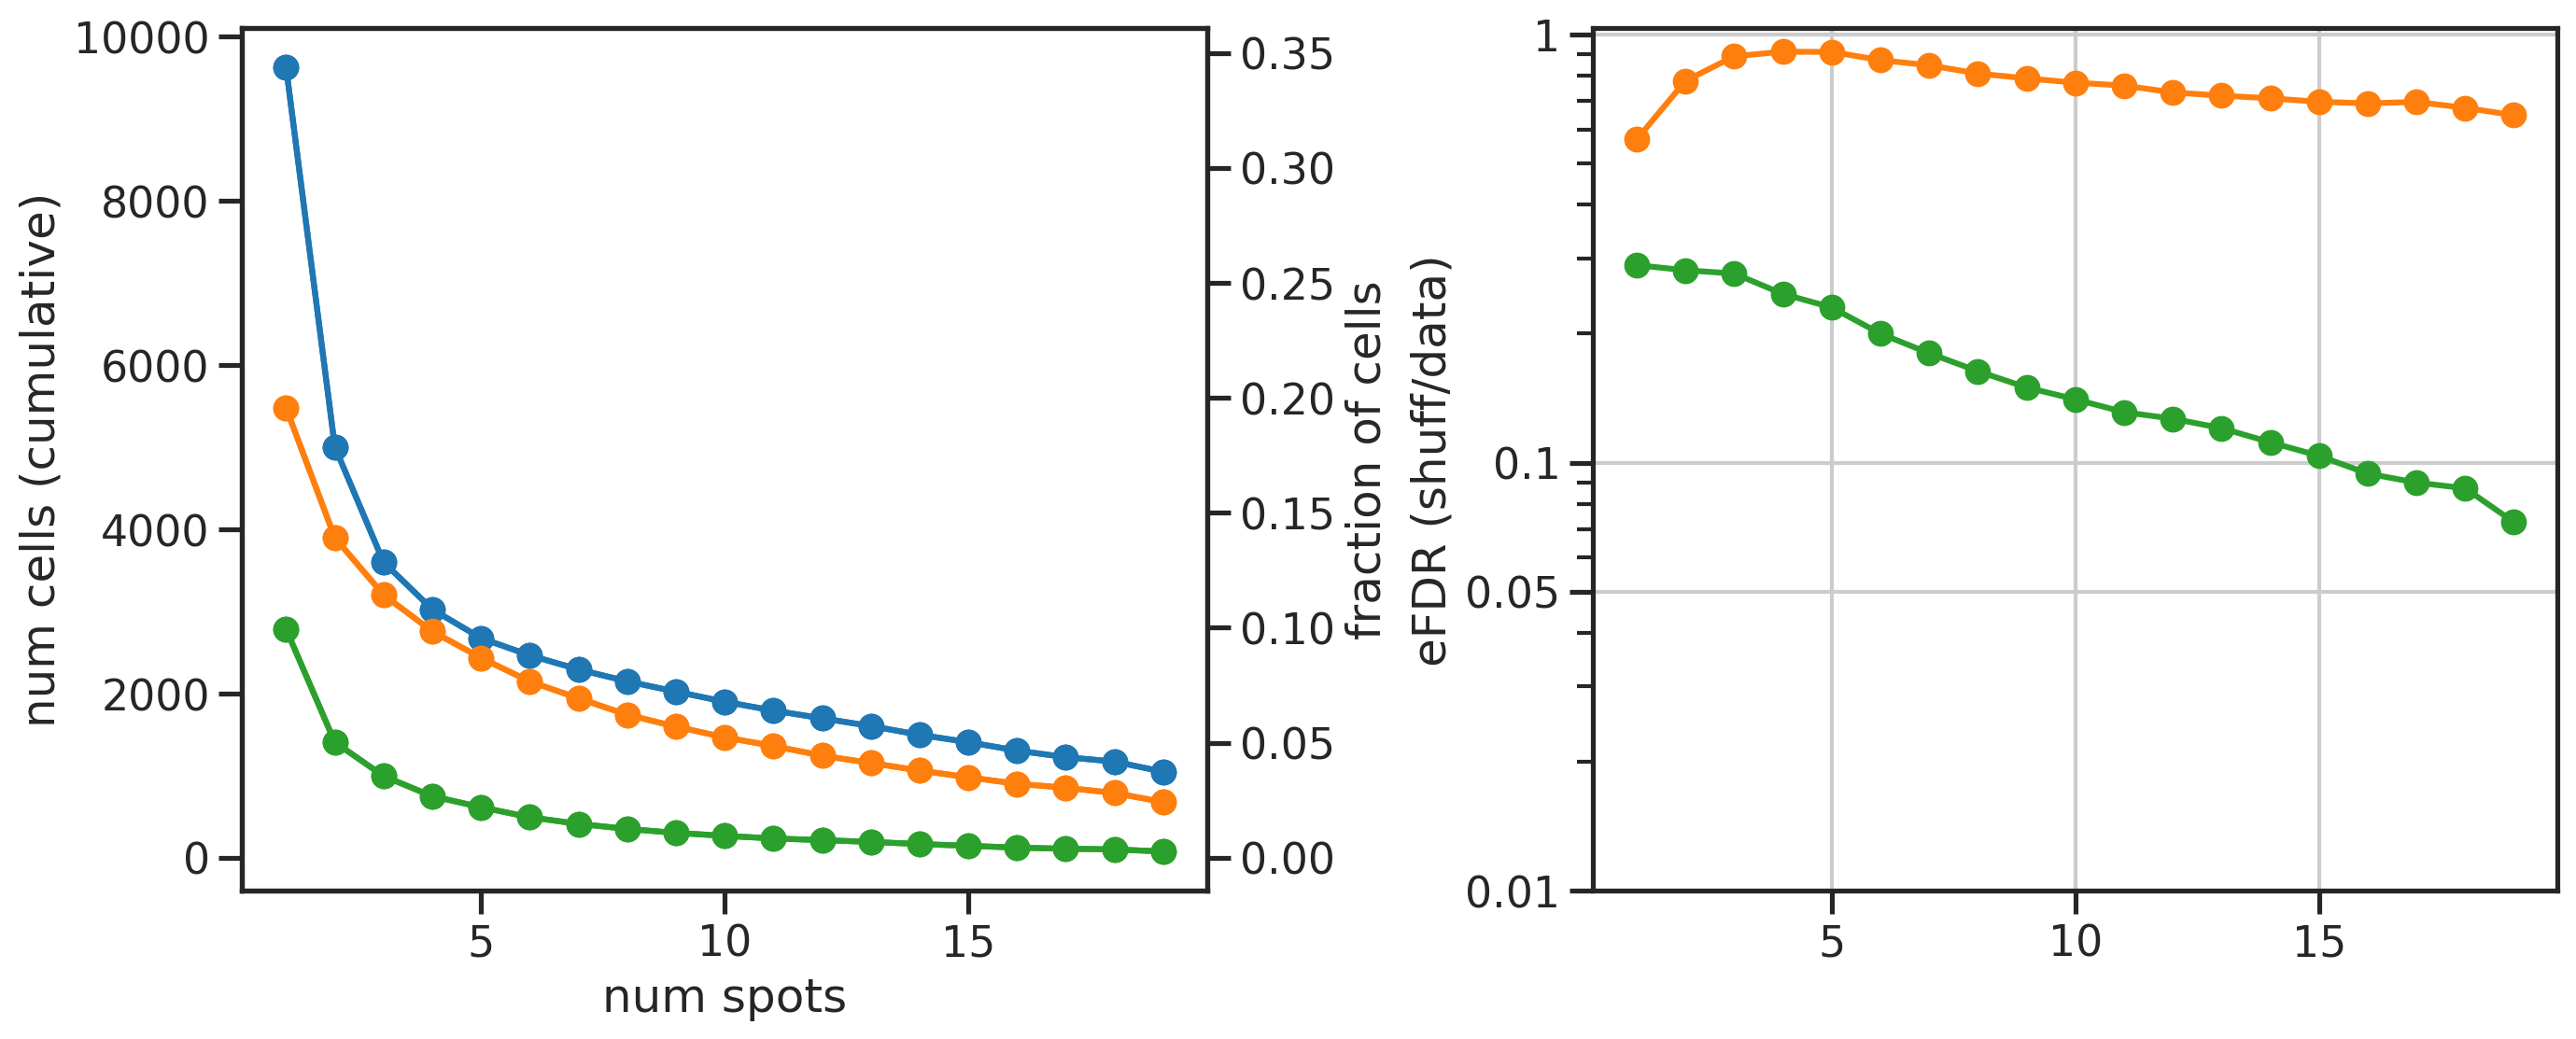

In [34]:
plot_reverse_cumsum_complex([c_c0, c_c2, c_bth], label_list=None, color_list=None, bins=np.arange(0,20,1), ymax=None)
plt.show()

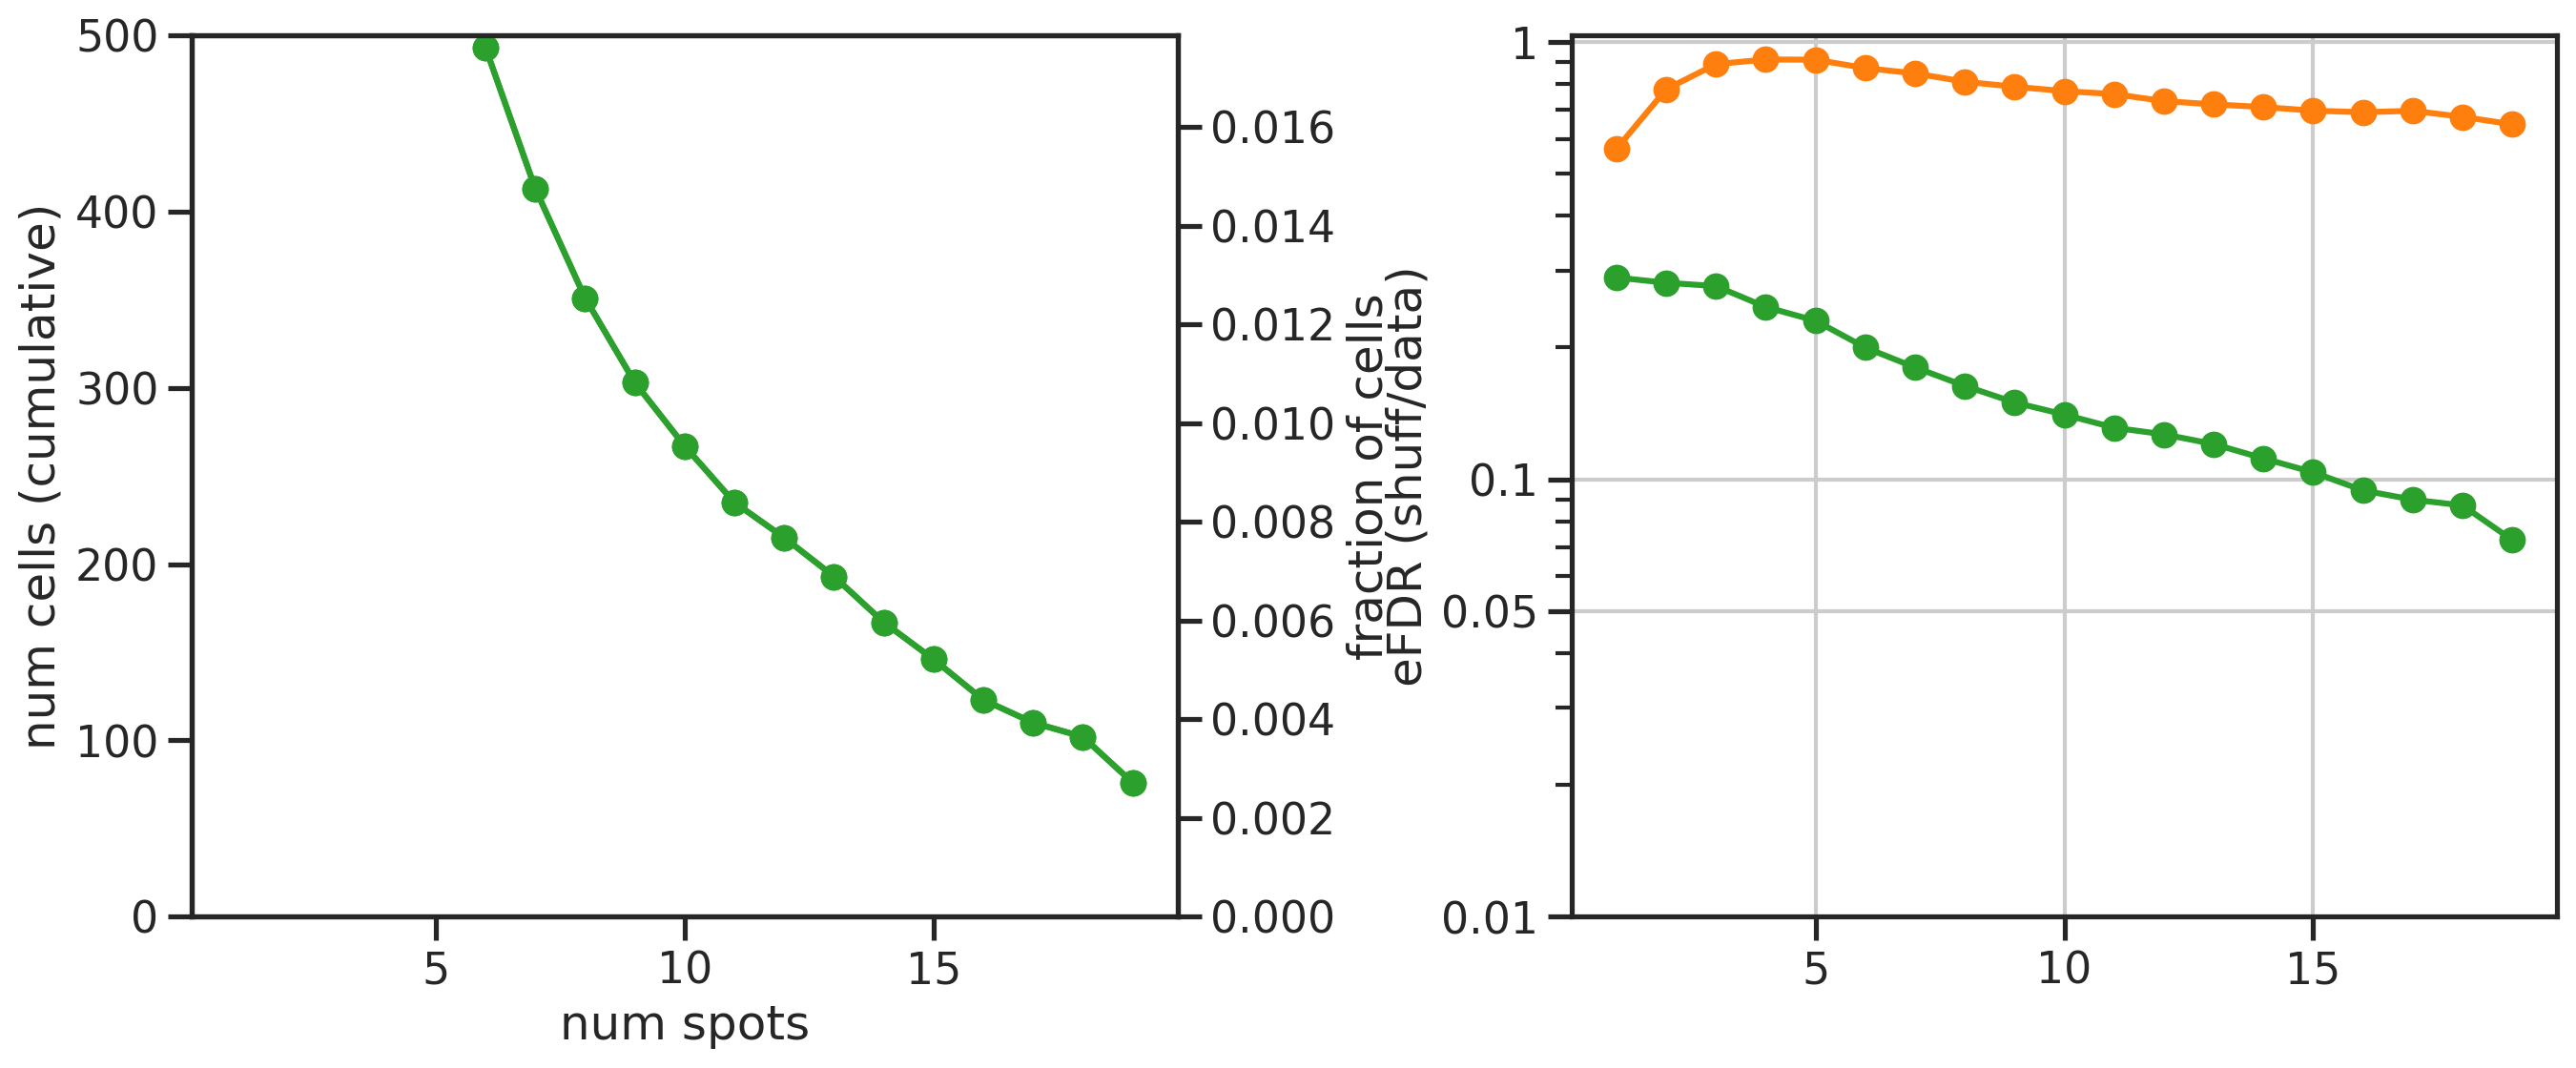

In [35]:
plot_reverse_cumsum_complex([c_c0, c_c2, c_bth], label_list=None, color_list=None, bins=np.arange(0,20,1), ymax=500)
plt.show()